In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot 

In [2]:
# load the data
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.180,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8
1,white,5.3,0.395,0.07,1.3,0.035,26.0,102.0,0.99200,3.50,0.35,10.6,6
2,red,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
3,white,6.4,0.220,0.34,1.4,0.023,56.0,115.0,0.98958,3.18,0.70,11.7,6
4,red,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7


In [4]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [5]:
def wine_label(q):
    if q > 5:
        return 1 
    else: 
        return 0
df["quality"] = df["quality"].apply(wine_label)

In [6]:
df['quality'].value_counts()

quality
1    4113
0    2384
Name: count, dtype: int64

In [7]:
#  wine type is not related to quality. Drop this column
df.drop(columns = ['wine type'] , axis = 1 , inplace = True)

In [8]:
# column citric acid values with greater than 0.95 is outlier remove all where value crosses the thresold 
df[df['citric acid'] > 0.95].shape

(9, 12)

In [9]:
# column citric acid values with greater than 0.95 is outlier remove all where value crosses the thresold 
df = df[df['citric acid'] <= 0.95]

In [10]:
# residual sugar column has outlier, remove all rows where values are greater than 25
df[df['residual sugar'] > 25]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3671,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,1
4701,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1
5479,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,1
5857,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1
6180,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,1


In [11]:
# residual sugar column has outlier, remove all rows where values are greater than 25
df = df[df['residual sugar'] <= 25]

In [12]:
df.shape

(6483, 12)

In [13]:
# total sulfur dioxide has outlier 
df = df[df['total sulfur dioxide'] <= 280]

In [14]:
# fixed acidity is almost same for all quality , also correlation is -0.08 not really correlated 
df = df.drop(columns=["fixed acidity"])

In [15]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.180,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,1
1,0.395,0.07,1.3,0.035,26.0,102.0,0.99200,3.50,0.35,10.6,1
2,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,0
3,0.220,0.34,1.4,0.023,56.0,115.0,0.98958,3.18,0.70,11.7,1
4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,1


In [16]:
df.shape

(6475, 11)

In [17]:
# `density` is not changing for `quality` not an usefull column , drop this column
df = df.drop(columns = ['density'])

In [18]:
# pH is not changing for quality not an usefull column drop this column 
df = df.drop(columns = ['pH'])

In [19]:
# quality is not really depending on sulphates, drop this column 
df = df.drop(columns = ['sulphates'])

In [20]:
# seprate X and y 
X = df.drop("quality" , axis = 1)
y = df['quality']

## Now we have to do the transformation

In [21]:
log_cols = ['volatile acidity' , 'residual sugar', 'chlorides']
sqrt_cols = ['free sulfur dioxide']
other_cols = [col for col in X.columns if col not in log_cols + sqrt_cols] 

In [22]:
other_cols

['citric acid', 'total sulfur dioxide', 'alcohol']

In [23]:
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# define log transformers  
log_pipeline = Pipeline(steps = [
    ("log" , FunctionTransformer(np.log1p , validate = False)) , 
    ("scaler" , StandardScaler())
])

In [25]:
# define sqrt transformer with scaling 
sqrt_pipeline = Pipeline(steps = [
    ("sqrt" , FunctionTransformer(np.sqrt , validate = False)), 
    ("scaler" , StandardScaler())
])

In [26]:
# define a scaler for others column
scaler_pipeline = Pipeline(steps = [
    ("scaler" , StandardScaler())
])

In [27]:
# define the column transformer 
preprocessor = ColumnTransformer(
    transformers = [
        ("log" , log_pipeline , log_cols),
        ("sqrt" , sqrt_pipeline , sqrt_cols),
        ("others" , scaler_pipeline , other_cols)
    ]
)

In [28]:
# transformed X 
X_transformed = preprocessor.fit_transform(X)

### Handle Imbalance Issue

In [29]:
from imblearn.combine import SMOTETomek , SMOTEENN

# Resampling the minority class. The strategy can be changed as required. 
smt = SMOTEENN(random_state = 42 , sampling_strategy = "minority")

X_res , y_res = smt.fit_resample(X_transformed , y)

In [30]:
X.shape

(6475, 7)

In [31]:
X_res.shape

(5372, 7)

In [32]:
from collections import Counter

Counter(y_res)

Counter({0: 2940, 1: 2432})

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.2 , random_state = 42)

X_train.shape , X_test.shape

((4297, 7), (1075, 7))

In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [35]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [36]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [37]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X , y , models): 

    # Do the train test split 
    X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

    models_list = []
    accuracy_list = [] 
    auc_list = []

    for i in range(len(list(models))): 
        # extract the model object and model name 
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # do the train 
        model.fit(X_train , y_train)

        # Do the prediction on training data
        y_train_pred = model.predict(X_train)  
        # Do the prediction on test data
        y_test_pred = model.predict(X_test)

        # performance on training data
        model_train_accuracy, model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)
        # performance on test data
        model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(f"Model: {model_name}")
        models_list.append(model_name)
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc_list.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    # make the report 
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report


## Model Training

In [38]:
y_res.value_counts()

quality
0    2940
1    2432
Name: count, dtype: int64

In [39]:
base_model_report = evaluate_models(X = X_res, y = y_res , models = models)

Model: Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9544
- F1 score: 0.9487
- Precision: 0.9437
- Recall: 0.9537
- Roc Auc Score: 0.9543


Model: Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9256
- F1 score: 0.9168
- Precision: 0.9055
- Recall: 0.9284
- Roc Auc Score: 0.9259


Model: Gradient Boosting
Model performance for Training set
- Accuracy: 0.9118
- F1 score: 0.9020
- Precision: 0.9131
- Recall: 0.8912
- Roc Auc Score: 0.9101
----------------------------------
Model performance for Test set
- Accuracy: 0.8828
- F1 score: 0.8636
- Precision: 0.8886
- Recall: 0.8400
- Roc Auc Score: 0.8783


Model: Logistic Regression
Mod

In [40]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.954419
5,XGBClassifier,0.943256
6,CatBoosting Classifier,0.933953
4,K-Neighbors Classifier,0.933023
1,Decision Tree,0.925581
2,Gradient Boosting,0.882791
7,Support Vector Classifier,0.871628
8,AdaBoost Classifier,0.831628
3,Logistic Regression,0.822326


## Hyper Parameter tuning for top-5 models

In [41]:
#Initialize few parameter for Hyperparamter tuning


# XGBoost parameters
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300]
}

# Random Forest parameters
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# K-Nearest Neighbors parameters
knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9, 11],
    "p": [1, 2]  # 1: Manhattan, 2: Euclidean
}

# CatBoost parameters
catboost_params = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [100, 200, 300],
    "l2_leaf_reg": [1, 3, 5, 7]
}

# Decision Tree parameters
dt_params = {
    "max_depth": [None, 5, 10, 15, 20],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

In [42]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params), 
    ("CatBoost" , CatBoostClassifier(verbose = False) , catboost_params), 
    ("DecisionTreeClassifier" , DecisionTreeClassifier() , dt_params)
]

## Do the tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV 

best_models = {}  # to store the best estimators
best_params = {}  # to store the best parameters

for model_name, model_obj, params in randomcv_models:
    print(f"\nRunning RandomizedSearchCV for {model_name}...")
    
    random_search = RandomizedSearchCV(
        estimator = model_obj, 
        n_iter = 20, 
        param_distributions = params, 
        cv = 5, 
        verbose = 5, 
        n_jobs = -1, 
        random_state = 42
    )
    random_search.fit(X_train, y_train) 
    
    best_models[model_name] = random_search.best_estimator_
    best_params[model_name] = random_search.best_params_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")



Running RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for XGBoost: {'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1}

Running RandomizedSearchCV for RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

Running RandomizedSearchCV for KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 4, 'algorithm': 'brute'}

Running RandomizedSearchCV for CatBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 10}

Running RandomizedSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
B

## Retraining the top-5 model with best Params

In [45]:
best_models = {
    "Random Forest Classifier" : RandomForestClassifier(**best_params['RandomForest']), 
    "KNN Classifier" : KNeighborsClassifier(**best_params['KNN']),
    "XGboost Classifier" : XGBClassifier(**best_params['XGBoost']), 
    "Catboost Classifier" : CatBoostClassifier(**best_params['CatBoost'] , verbose = False), 
    "DecisionTree Classifier" : DecisionTreeClassifier(**best_params['DecisionTreeClassifier']),
}

In [46]:
tuned_report = evaluate_models(X = X_res , y = y_res , models = best_models)

Model: Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9535
- F1 score: 0.9474
- Precision: 0.9474
- Recall: 0.9474
- Roc Auc Score: 0.9529


Model: KNN Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9758
- F1 score: 0.9725
- Precision: 0.9787
- Recall: 0.9663
- Roc Auc Score: 0.9748


Model: XGboost Classifier
Model performance for Training set
- Accuracy: 0.9991
- F1 score: 0.9990
- Precision: 0.9995
- Recall: 0.9985
- Roc Auc Score: 0.9990
----------------------------------
Model performance for Test set
- Accuracy: 0.9479
- F1 score: 0.9412
- Precision: 0.9392
- Recall: 0.9432
- Roc Auc Score: 0.9474


Model: Catboost C

In [47]:
tuned_report

,Model Name,Accuracy
1,KNN Classifier,0.975814
3,Catboost Classifier,0.960000
0,Random Forest Classifier,0.953488
2,XGboost Classifier,0.947907
4,DecisionTree Classifier,0.904186


In [49]:
best_model = KNeighborsClassifier(**best_params['KNN'])
best_model.fit(X_train , y_train)

,n_neighbors,4
,weights,'distance'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred = best_model.predict(X_test)

In [51]:
score = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)

print(f"Accuracy Score: {score}")
print(cr)

Accuracy Score: 0.9758139534883721
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       600
           1       0.98      0.97      0.97       475

    accuracy                           0.98      1075
   macro avg       0.98      0.97      0.98      1075
weighted avg       0.98      0.98      0.98      1075



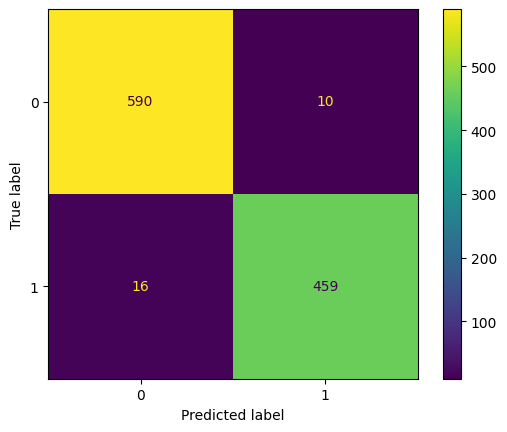

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 98%